In [15]:
!pip install graphviz==0.10
!sudo apt-get install graphviz

[sudo] password for nbuser: 


In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## Trocar valores  (no/yes)

In [4]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
from datetime import datetime

ano_atual = datetime.today().year

dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


In [6]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,19,35085.22134
1,1,7843,1998,40557.96,1,21,12622.05362
2,2,7109,2006,89627.50,0,13,11440.79806
3,3,26823,2015,95276.14,0,4,43167.32682
4,4,7935,2014,117384.68,1,5,12770.11290


## Apagando columns

In [7]:
dados = dados.drop(columns = ['Unnamed: 0', "milhas_por_ano", "ano_do_modelo"])
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,19,35085.22134
1,40557.96,1,21,12622.05362
2,89627.50,0,13,11440.79806
3,95276.14,0,4,43167.32682
4,117384.68,1,5,12770.11290


In [8]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED =5 
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 57.88%


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Criando um baseline
### uso do DymmyClassifier

In [9]:
from sklearn.dummy import DummyClassifier

duummy_stratified = DummyClassifier()
duummy_stratified.fit(treino_x, treino_y)
acuracia = duummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do duummy  stratified foi %.2f%%" % acuracia)

A acurácia do duummy  stratified foi 52.44%


In [10]:
from sklearn.dummy import DummyClassifier

duummy_mostfrequent = DummyClassifier()
duummy_mostfrequent.fit(treino_x, treino_y)
previsoes = duummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do duummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do duummy mostfrequent foi 50.68%


# Usando o SVC

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED =5 
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


A acurácia foi 77.48%


# Decision Tree

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED =5 
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


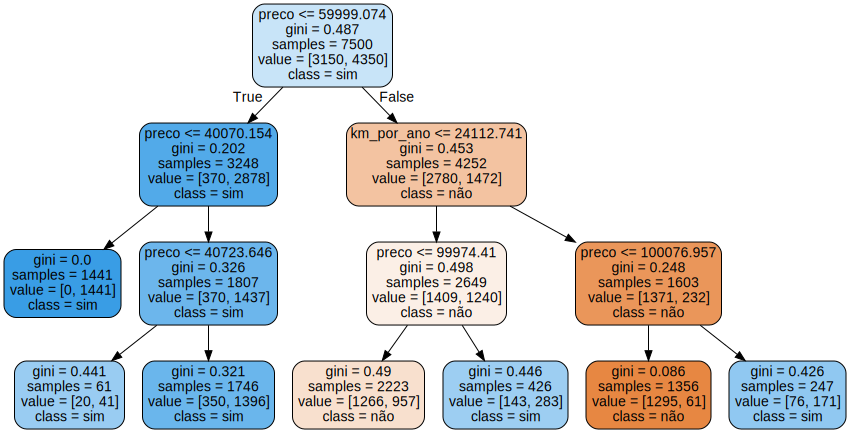

In [32]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, 
                           filled = True, rounded = True, 
                           feature_names = features,
                           class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico